In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [4]:
results_path = pathlib.Path('/Users/alexnaokiasatokobayashi/Documents/data/Gals/results')
files = list(results_path.glob('*bestPareto.nc'))
for file in files:
    print(file.name)

test5kMC_20250823_bestPareto.nc
test10kMC_20250823_bestPareto.nc
test15kMC_20250823_bestPareto.nc
test8kMC_20250823_bestPareto.nc


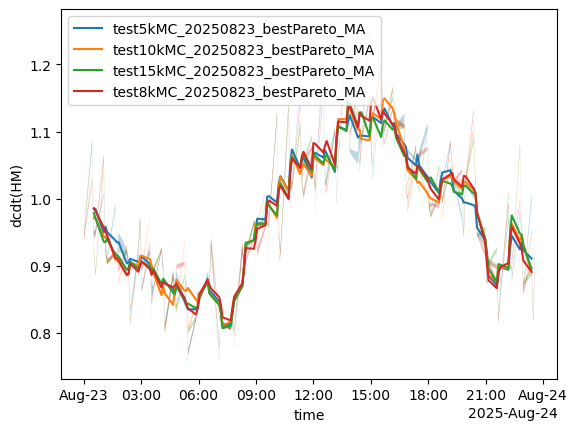

In [17]:
fig, ax = plt.subplots()
for file in files:
    ds = xr.open_dataset(file)
    # print(ds)
    
    # ds['dcdt(HM)'].median(dim='MC').plot(label=file.stem, ax=ax)
    #moving average
    ds['dcdt(HM)'].rolling(time=5, center=True).mean().median(dim='MC').plot(label=file.stem+'_MA', ax=ax)

    q16 = ds['dcdt(HM)'].quantile(0.16, dim='MC')
    q84 = ds['dcdt(HM)'].quantile(0.84, dim='MC')
    ax.fill_between(ds['time'], q16, q84, alpha=0.3)

    ax.legend()
    # break

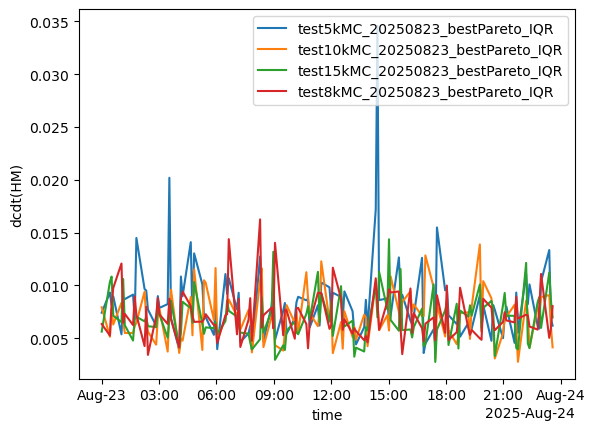

In [18]:
fig, ax = plt.subplots()

for file in files:
    ds = xr.open_dataset(file)
    # print(ds)
    
    # ds['dcdt(HM)'].median(dim='MC').plot(label=file.stem, ax=ax)
    #moving average
    # ds['dcdt(HM)'].rolling(time=5, center=True).mean().median(dim='MC').plot(label=file.stem+'_MA', ax=ax)

    q16 = ds['dcdt(HM)'].quantile(0.16, dim='MC')
    q84 = ds['dcdt(HM)'].quantile(0.84, dim='MC')
    diff = q84 - q16
    diff.plot(label=file.stem+'_IQR', ax=ax)
    # ax.fill_between(ds['time'], q16, q84, alpha=0.3)

    ax.legend()
    # break